In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import pylib
import numpy.ma as ma

plt.rcParams.update({'font.size': 36})


In [2]:
main_load_folder = './data'

# the path for loading the fightbout info
fightBouts_info_path = os.path.join(main_load_folder, 'fightBouts.h5')

with h5py.File(fightBouts_info_path, 'r') as hf:
    fight_bout_info = hf['fight_bout_info'][:]
    fight_bout_info_noDurThresh = hf['fight_bout_info_noDurThresh'][:]

In [3]:
dt = 1/100

In [5]:
filename = './data/info_flow_vr_'+'17_'
T = 1
lag = 1#maxt#1

tau = int(30/dt) # window
l = int(10/dt) # interval


gap = 1
maxtau = int(5/dt/gap)
maxt= int(maxtau/T)

In [6]:
def sem(a):
    a = ma.masked_invalid(a)
    return np.array([np.nanstd(b)/np.sqrt(len(b.compressed())) for b in a])
#     return np.array([np.nanstd(b) for b in a])

w = int(2.2*60*100/l) # range for the plot

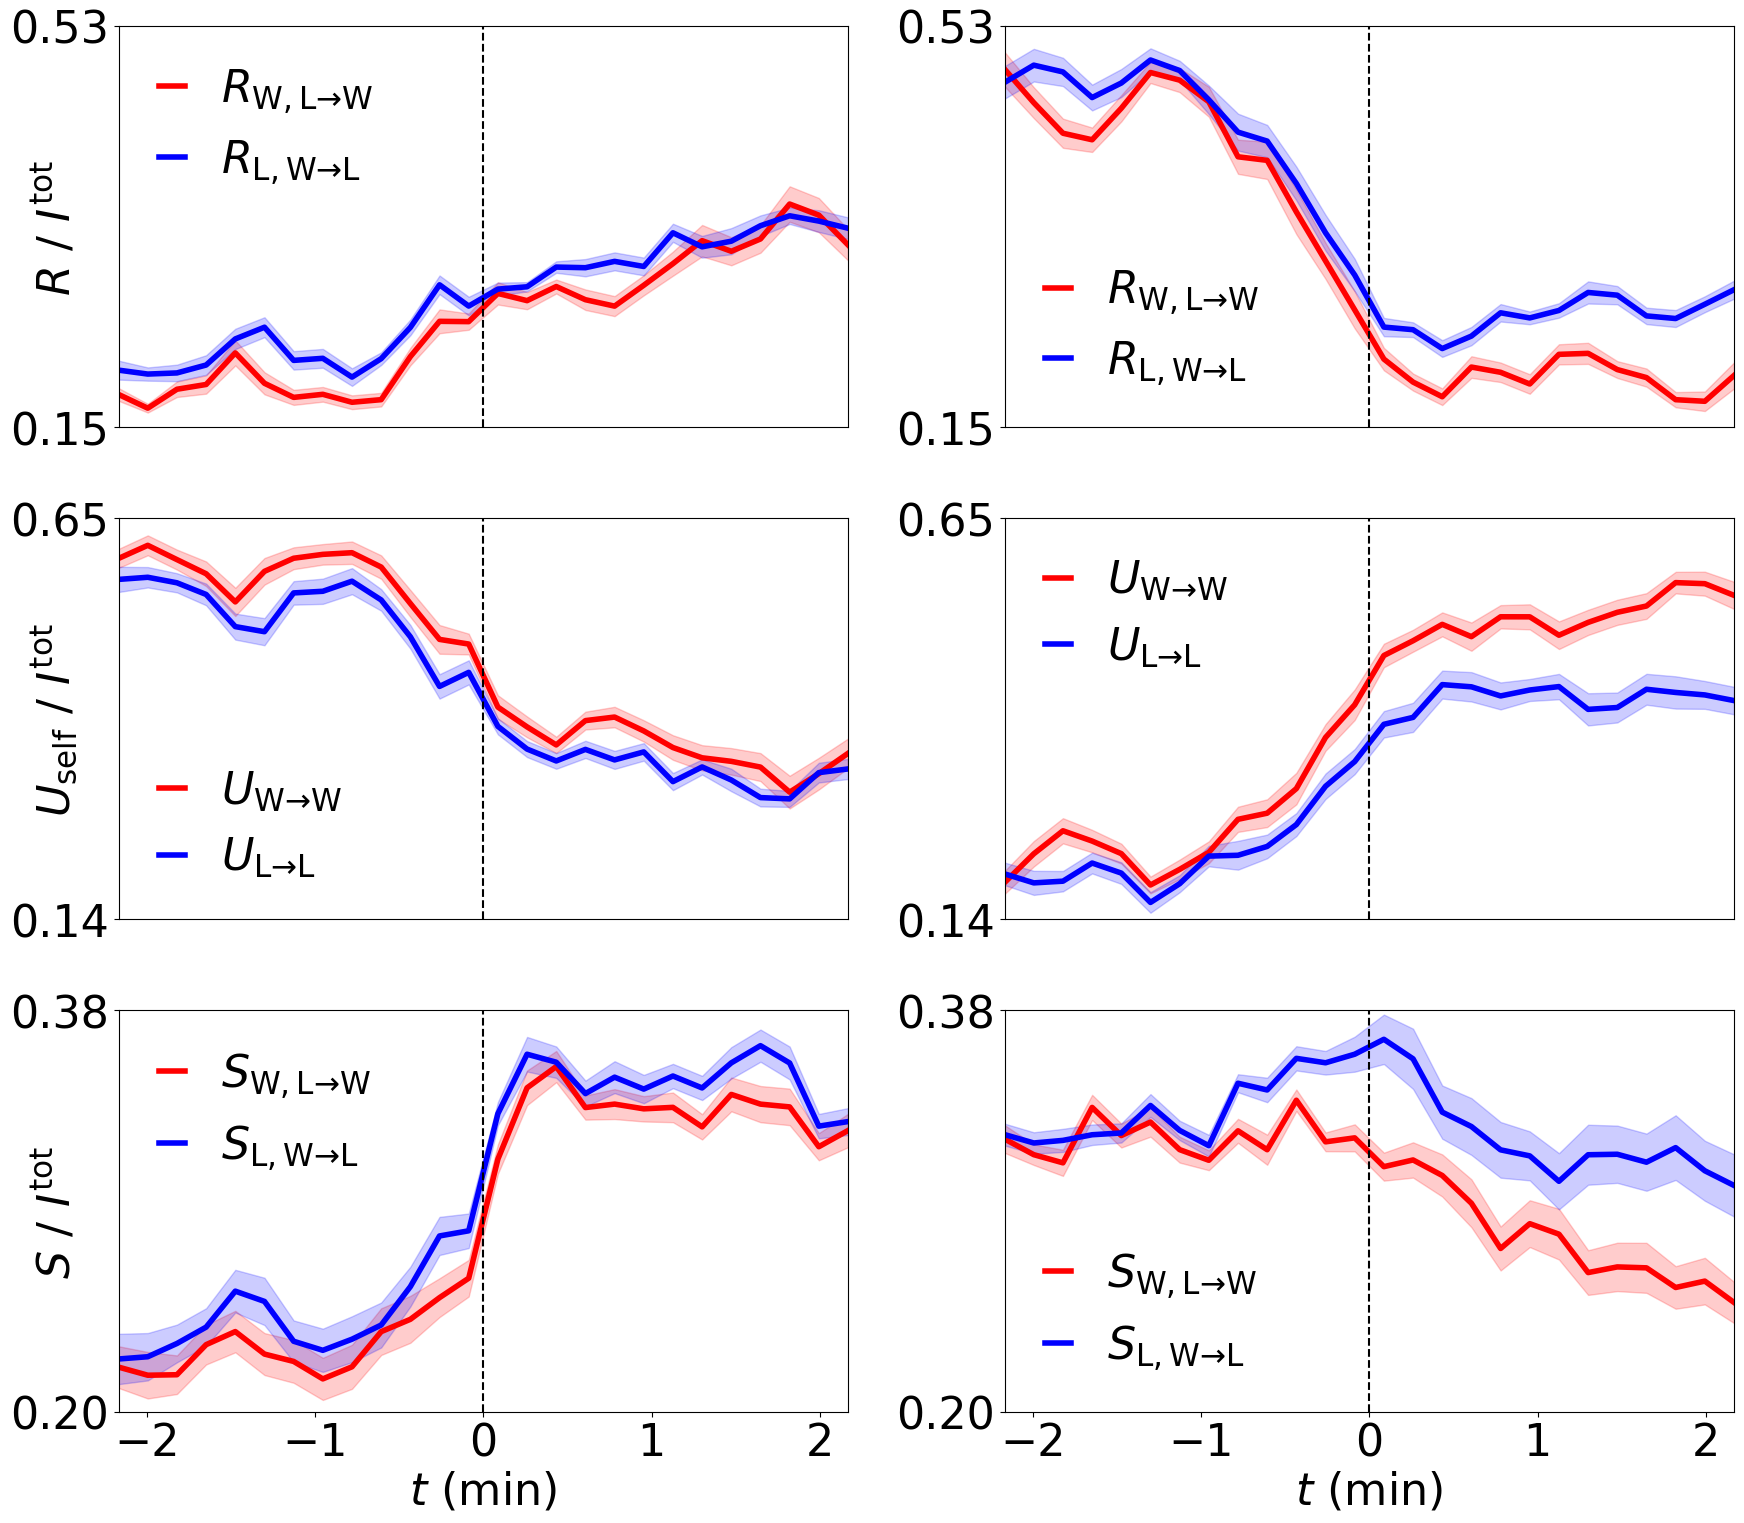

In [9]:
plt.rcParams.update({'font.size': 32})

r1s, u11s, u21s, s1s = [],[],[],[]
r2s, u22s, u12s, s2s = [],[],[],[]
r1e, u11e, u21e, s1e = [],[],[],[]
r2e, u22e, u12e, s2e = [],[],[],[]
for expid in np.unique(fight_bout_info.T[0]):
#     datapath = loadpaths[expid]

    fight_start = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][0,1]
    fight_end = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][0,2]

    filename2 = filename+str(expid)
    a = np.load(filename2+'.npy',allow_pickle=1)
    if a[0][1]==0:
        continue
    mi11 = a[1][0]
    mi21 = a[1][2]
    mi121 = a[1][5]
    mi121[np.where(mi121<10**-2)] = np.nan
    r1 = np.min([mi11,mi21],axis=0)
    u11 = mi11 - r1
    u21 = mi21 - r1
    s1 = mi121 - u11 - u21 - r1
    r1 = r1/mi121
    u11 = u11/mi121
    u21 = u21/mi121
    s1 = s1/mi121
    
    mi22 = a[1][3]
    mi12 = a[1][1]
    mi212 = a[1][4]
    mi212[np.where(mi212<10**-2)] = np.nan
    r2 = np.min([mi22,mi12],axis=0)
    u22 = mi22 - r2
    u12 = mi12 - r2
    s2 = mi212 - u22 - u12 - r2
    r2 = r2/mi212
    u22 = u22/mi212
    u12 = u12/mi212
    s2 = s2/mi212

    fight_start = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][:,1]/l
    for fs in fight_start:
#         fs = int(a[0][1]/l)
#         print(fs*l)
        window1 = np.linspace(fs-w,fs+w,2*w,dtype='int')
        r1_w, u11_w, u21_w, s1_w = np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan)
        r2_w, u22_w, u12_w, s2_w = np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan)
        j = 0
        for i in window1:
            if i<0 or i>=len(r1):
                j += 1
#                 print('no data',i)
            else:
                r1_w[j] = r1[i]
                u11_w[j] = u11[i]
                u21_w[j] = u21[i]
                s1_w[j] = s1[i]
                r2_w[j] = r2[i]
                u22_w[j] = u22[i]
                u12_w[j] = u12[i]
                s2_w[j] = s2[i]
                j += 1
        r1s.append(r1_w)
        u11s.append(u11_w)
        u21s.append(u21_w)
        s1s.append(s1_w)
        r2s.append(r2_w)
        u22s.append(u22_w)
        u12s.append(u12_w)
        s2s.append(s2_w)
        
    fight_end = fight_bout_info[np.where(fight_bout_info.T[0]==expid)][:,2]/l
    for fs in fight_end:
#         fs = int(a[0][1]/l)
#         print(fs*l)
        window1 = np.linspace(fs-w,fs+w,2*w,dtype='int')
        r1_w, u11_w, u21_w, s1_w = np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan)
        r2_w, u22_w, u12_w, s2_w = np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan),np.full(len(window1),np.nan)
        j = 0
        for i in window1:
            if i<0 or i>=len(r1):
                j += 1
#                 print('no data',i)
            else:
                r1_w[j] = r1[i]
                u11_w[j] = u11[i]
                u21_w[j] = u21[i]
                s1_w[j] = s1[i]
                r2_w[j] = r2[i]
                u22_w[j] = u22[i]
                u12_w[j] = u12[i]
                s2_w[j] = s2[i]
                j += 1
        r1e.append(r1_w)
        u11e.append(u11_w)
        u21e.append(u21_w)
        s1e.append(s1_w)
        r2e.append(r2_w)
        u22e.append(u22_w)
        u12e.append(u12_w)
        s2e.append(s2_w)
        
r1_m = np.nanmean(r1s,axis=0)
u11_m = np.nanmean(u11s,axis=0)
u21_m = np.nanmean(u21s,axis=0)
s1_m = np.nanmean(s1s,axis=0)
r2_m = np.nanmean(r2s,axis=0)
u22_m = np.nanmean(u22s,axis=0)
u12_m = np.nanmean(u12s,axis=0)
s2_m = np.nanmean(s2s,axis=0)
r1_s = sem(np.array(r1s).T)
u11_s = sem(np.array(u11s).T)
u21_s = sem(np.array(u21s).T)
s1_s = sem(np.array(s1s).T)
r2_s = sem(np.array(r2s).T)
u22_s = sem(np.array(u22s).T)
u12_s = sem(np.array(u12s).T)
s2_s = sem(np.array(s2s).T)

r1e_m = np.nanmean(r1e,axis=0)
u11e_m = np.nanmean(u11e,axis=0)
u21e_m = np.nanmean(u21e,axis=0)
s1e_m = np.nanmean(s1e,axis=0)
r2e_m = np.nanmean(r2e,axis=0)
u22e_m = np.nanmean(u22e,axis=0)
u12e_m = np.nanmean(u12e,axis=0)
s2e_m = np.nanmean(s2e,axis=0)
r1e_s = sem(np.array(r1e).T)
u11e_s = sem(np.array(u11e).T)
u21e_s = sem(np.array(u21e).T)
s1e_s = sem(np.array(s1e).T)
r2e_s = sem(np.array(r2e).T)
u22e_s = sem(np.array(u22e).T)
u12e_s = sem(np.array(u12e).T)
s2e_s = sem(np.array(s2e).T)

time = np.linspace(-w*l,w*l,2*w)/60*dt

fig, axes = plt.subplots(3, 2, figsize=(14*1.3, 20*.8))

axes[0,0].plot(time,r1_m,'-',lw=4,c='r',label='$R_\mathrm{W,L\\to W}$')
axes[0,0].fill_between(time,r1_m+r1_s/2.,r1_m-r1_s/2.,alpha=.2,color='r')
axes[0,0].plot(time,r2_m,'-',lw=4,c='b',label='$R_\mathrm{L,W\\to L}$')
axes[0,0].fill_between(time,r2_m+r2_s/2.,r2_m-r2_s/2.,alpha=.2,color='b')
axes[0,0].axvline(0,c='k',ls='--')
axes[0,0].legend(loc='upper left',handlelength=.6,framealpha=0.)
rlim = [0.15,0.53]
rtick = rlim#[0.2,0.5]
axes[0,0].set_yticks(rtick)
axes[0,0].set_ylim(rlim)
axes[0,0].set_xlim([time[0],time[-1]])
axes[0,0].set_ylabel('$R\ /\ I^\mathrm{tot}$', labelpad=-50)
axes[0,0].set_xticks([])

axes[1,0].plot(time,u11_m,'-',lw=4,c='r',label='$U_\mathrm{W\\to W}$')
axes[1,0].fill_between(time,u11_m+u11_s/2.,u11_m-u11_s/2.,alpha=.2,color='r')
axes[1,0].plot(time,u22_m,'-',lw=4,c='b',label='$U_\mathrm{L\\to L}$')
axes[1,0].fill_between(time,u22_m+u22_s/2.,u22_m-u22_s/2.,alpha=.2,color='b')
axes[1,0].axvline(0,c='k',ls='--')
axes[1,0].legend(loc='lower left',handlelength=.6,framealpha=0.)
ulim = [0.14,0.65]
utick = ulim#[0.2,0.6]
axes[1,0].set_yticks(utick)
axes[1,0].set_ylim(ulim)
axes[1,0].set_xlim([time[0],time[-1]])
axes[1,0].set_ylabel('$U_{\mathrm{self}}\ /\ I^\mathrm{tot}$', labelpad=-50)
axes[1,0].set_xticks([])

axes[2,0].plot(time,s1_m,'-',lw=4,c='r',label='$S_\mathrm{W,L\\to W}$')
axes[2,0].fill_between(time,s1_m+s1_s/2.,s1_m-s1_s/2.,alpha=.2,color='r')
axes[2,0].plot(time,s2_m,'-',lw=4,c='b',label='$S_\mathrm{L,W\\to L}$')
axes[2,0].fill_between(time,s2_m+s2_s/2.,s2_m-s2_s/2.,alpha=.2,color='b')
axes[2,0].axvline(0,c='k',ls='--')
axes[2,0].legend(loc='upper left',handlelength=.6,framealpha=0.)
slim = [0.2,0.38]
stick = slim#[0.2,0.4]
axes[2,0].set_yticks(stick)
axes[2,0].set_ylim(slim)
axes[2,0].set_xlim([time[0],time[-1]])
axes[2,0].set_ylabel('$S\ /\ I^\mathrm{tot}$', labelpad=-50)
axes[2,0].set_xlabel('$t$ (min)')


axes[0,1].plot(time,r1e_m,'-',lw=4,c='r',label='$R_\mathrm{W,L\\to W}$')
axes[0,1].fill_between(time,r1e_m+r1e_s/2.,r1e_m-r1e_s/2.,alpha=.2,color='r')
axes[0,1].plot(time,r2e_m,'-',lw=4,c='b',label='$R_\mathrm{L,W\\to L}$')
axes[0,1].fill_between(time,r2e_m+r2e_s/2.,r2e_m-r2e_s/2.,alpha=.2,color='b')
axes[0,1].axvline(0,c='k',ls='--')
axes[0,1].legend(loc='lower left',handlelength=.6,framealpha=0.)
axes[0,1].set_ylim(rlim)
axes[0,1].set_yticks(rtick)
axes[0,1].set_xlim([time[0],time[-1]])
axes[0,1].set_xticks([])

axes[1,1].plot(time,u11e_m,'-',lw=4,c='r',label='$U_\mathrm{W\\to W}$')
axes[1,1].fill_between(time,u11e_m+u11e_s/2.,u11e_m-u11e_s/2.,alpha=.2,color='r')
axes[1,1].plot(time,u22e_m,'-',lw=4,c='b',label='$U_\mathrm{L\\to L}$')
axes[1,1].fill_between(time,u22e_m+u22e_s/2.,u22e_m-u22e_s/2.,alpha=.2,color='b')
axes[1,1].axvline(0,c='k',ls='--')
axes[1,1].legend(loc='upper left',handlelength=.6,framealpha=0.)
axes[1,1].set_ylim(ulim)
axes[1,1].set_yticks(utick)
axes[1,1].set_xlim([time[0],time[-1]])
axes[1,1].set_xticks([])

axes[2,1].plot(time,s1e_m,'-',lw=4,c='r',label='$S_\mathrm{W,L\\to W}$')
axes[2,1].fill_between(time,s1e_m+s1e_s/2.,s1e_m-s1e_s/2.,alpha=.2,color='r')
axes[2,1].plot(time,s2e_m,'-',lw=4,c='b',label='$S_\mathrm{L,W\\to L}$')
axes[2,1].fill_between(time,s2e_m+s2e_s/2.,s2e_m-s2e_s/2.,alpha=.2,color='b')
axes[2,1].axvline(0,c='k',ls='--')
axes[2,1].legend(loc='lower left',handlelength=.6,framealpha=0.)
axes[2,1].set_ylim(slim)
axes[2,1].set_yticks(stick)
axes[2,1].set_xlim([time[0],time[-1]])
axes[2,1].set_xlabel('$t$ (min)')


# Adjust layout
plt.tight_layout()
plt.show()